<a href="https://colab.research.google.com/github/CamrennWallace-Rivera/MLB-Pitcher-Performance-Analysis/blob/main/MLB_Pitcher_Outcomes_CWR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal: Find out what role does pitcher performance (e.g., IP, H, SO, ER) play in game outcomes .​


Path to dataset files: /root/.cache/kagglehub/datasets/johnadamek/game-by-game-individual-pitching-data-20172020/versions/1
Files in the dataset directory: ['pitching_2019.csv', 'pitching_2018.csv', 'pitching_2020.csv', 'pitching_2017.csv']


<ipython-input-15-ebe474ea5bbe>:23: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


              Player   IP   O  H  R  ER  BB  HBP  SO  HR  ...  \
0     Marco Gonzales  6.0  18  7  4   3   1  0.0   4   2  ...   
1      Nick Rumbelow  0.1   1  2  3   3   1  0.0   1   1  ...   
2       Cory Gearrin  1.0   3  0  0   0   0  0.0   1   0  ...   
3        Zac Rosscup  0.2   2  0  0   0   1  0.0   0   0  ...   
4  Hunter Strickland  1.0   3  0  0   0   0  0.0   2   0  ...   

   Pitching.Total.FDP  Pitching.Total.DKP  Pitching.Total.YHP  Starter  \
0                31.0              14.700                16.8        1   
1                -5.7              -5.575                -5.7        0   
2                 6.0               4.250                 5.0        0   
3                 0.6              -0.150                 1.1        0   
4                 9.0               6.250                 7.0        0   

   Double.Header  Season  Starting.Pitcher  Over.Under  Moneyline  Wagers  
0              0    2019   M. Gonzales (L)         8.5      107.0    100%  
1           

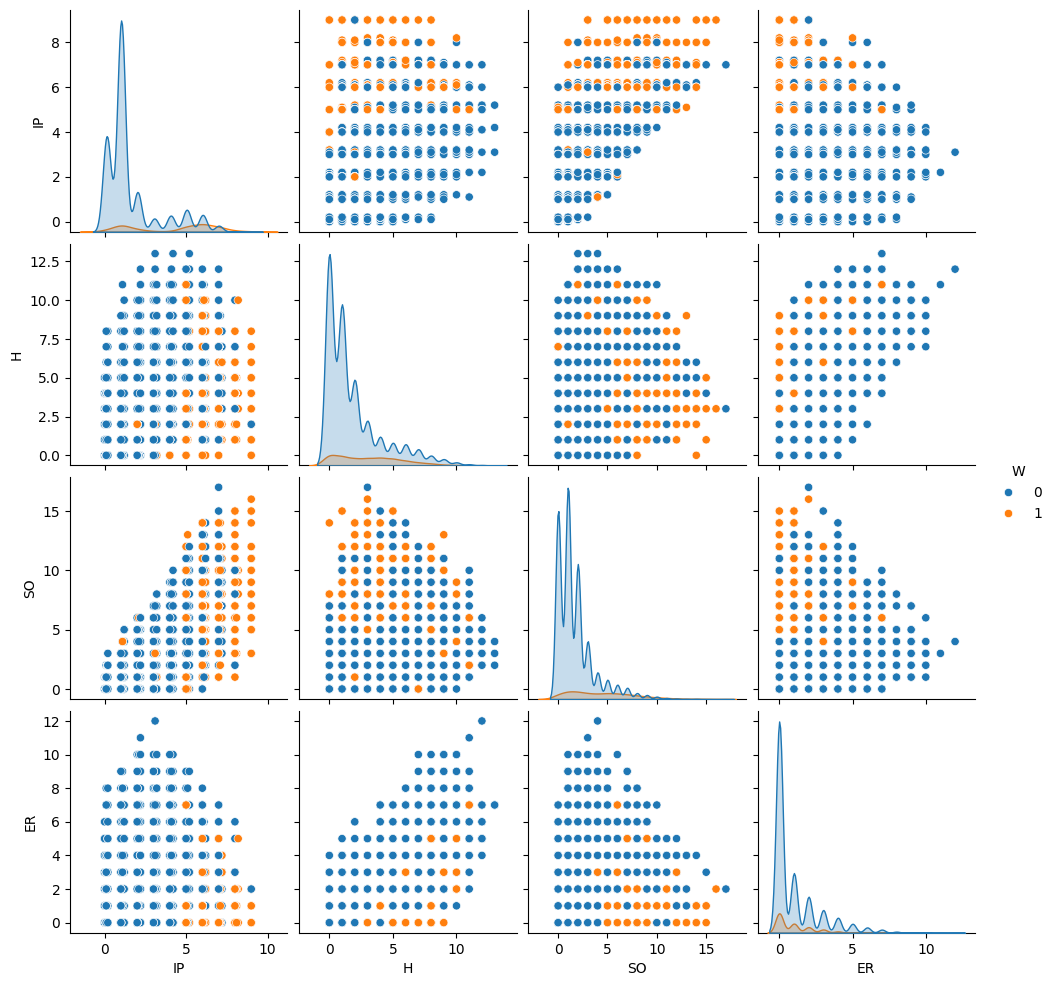

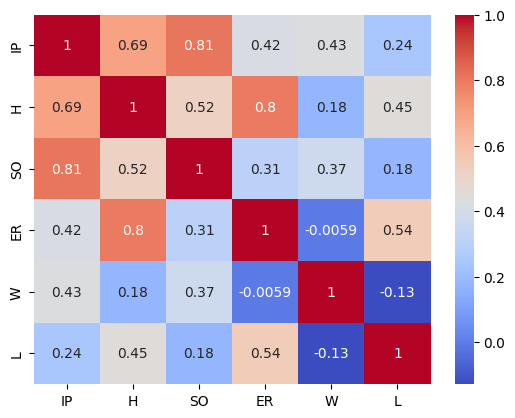

Accuracy: 0.89


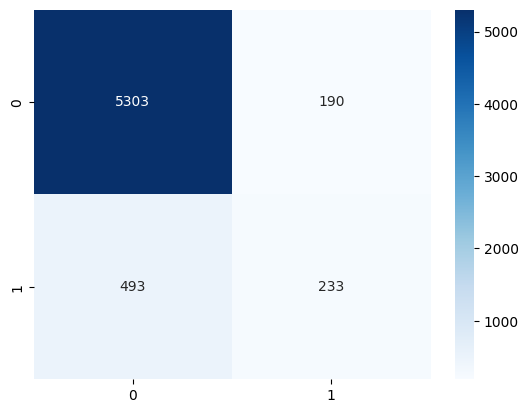

In [ ]:
import os
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Download the dataset from Kaggle
path = kagglehub.dataset_download("johnadamek/game-by-game-individual-pitching-data-20172020")
print("Path to dataset files:", path)

files = os.listdir(path)
print("Files in the dataset directory:", files)

csv_file = [file for file in files if file.endswith('.csv')][0]  # Find the CSV file
file_path = os.path.join(path, csv_file)

df = pd.read_csv(file_path)
print(df.head())

#  Select relevant columns (pitcher performance and at-bat outcome)
df = df[['IP', 'H', 'SO', 'ER', 'W', 'L', 'SV', 'BS', 'Team.R', 'Opponent.R']]  # Adjusted columns
df.dropna(inplace=True)  # Drop rows with missing data

#  Analyzing the relationship between pitcher performance and game outcomes
sns.pairplot(df, hue='W', vars=['IP', 'H', 'SO', 'ER'])  # Pairplot to compare pitcher performance with win/loss
plt.show()

#correlation heatmap
correlation = df[['IP', 'H', 'SO', 'ER', 'W', 'L']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

# Machine Learning model - Predict win/loss outcome based on pitcher performance
X = df[['IP', 'H', 'SO', 'ER']]  # Pitcher performance as features
y = df['W']  # Predict win/loss outcome (binary classification)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#  Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#  Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()
